Final RMSE 0: 6.784655900956583
Final RMSE 1: 5.280966463019373
Final RMSE 2: 4.374548130888627
Final RMSE 3: 43.382439659018644


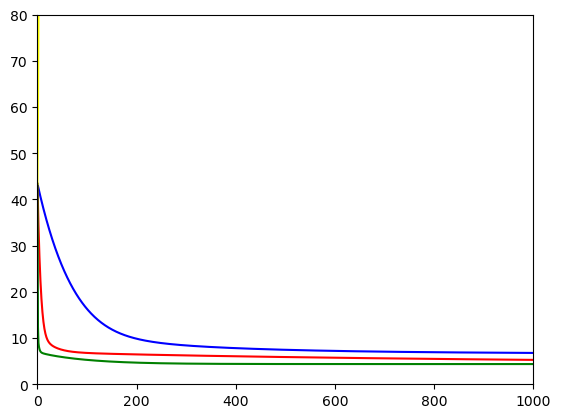

In [2]:
# Introduction: 
#
# This is the second part of the exercise "gradient descent".
# Last time, we used the evolution strategy to find appropriate
# coefficient values for a function that can predict the fuel consumption of cars.
# Since the evolution strategy randomly modifies the coefficients,
# it can take a long time to find a good configuration
#
#
# Problem definition:
#
# Exchange the evolution strategy with the linear regression.
# Remember, all theta values of the regression model must be changed at the same time during training.
#
# Sometimes gradient descent gets stuck in a local minima.
# A good indicator is the sum of absolute changes applied to the theta values,
# if the sum is quite small the gradient at this configuration is flat
# and only small progress is made. Increase the learning rate
# or repeat the test with different initial theta values to circumvent this problem.
# Remember the overall smallest RMSE and the corresponding theta values.
#
# Create four error curves by calculating and memorizing the RMSE
# for every epoch/iteration. Repeat the test with different
# learning rates (alpha = 0.01; 0.1; 1.0; 2.0).
# Always start with the same theta values by using a seeded random generator
# np.random.seed(7); 
# theta = np.random.rand(rows, columns);.
# Store and output the best RMSE for each curve.
# Train for 100 iterations.

import matplotlib.pyplot as plt
import math
import numpy as np
import random

# Enable inline plotting
%matplotlib inline

# Import the CSV file
cars = np.genfromtxt("cars.csv", delimiter=",", skip_header=True)

# Remove car names column from data
cars = np.delete(cars, 0, 1)

# Amount of datapoints per and iterations per learning curve
numDatapoints = len(cars[:, 0])
numIterations = 1000

# RMSE storage array
rmseValues = [[None] * numIterations, [None] * numIterations, [None] * numIterations, [None] * numIterations]

# Store max and min values of cars columns for denormalization
maxValues = np.amax(cars[:,0:7], 0)
minValues = np.amin(cars[:,0:7], 0)

# Normalize data in car matrix
normalizedData = (cars - minValues) / (maxValues - minValues)

# Approximate relation with weighted function
xValueMatrix = np.delete(normalizedData, 6, 1)

# Alpha value
learningRates = [0.01, 0.1, 1.0, 2.0]

# Create four different learning curves
for lc in range(len(learningRates)):
    # Set random seed
    np.random.seed(5)
    
    # Set initial theta values
    bestRmse = 10000
    thetaValues = np.random.rand(6, 1)
    bestTheta = []

    # Try multiple iterations to find best theta values
    for it in range(numIterations):
        # Calculate approximated mpg values with weighted function (hypothesis function)
        hypothesis = np.matmul(xValueMatrix, thetaValues)
        hypothesis = np.squeeze(hypothesis)

        # Calculate disparity
        disparity = hypothesis - normalizedData[:, 6]

        # Calculate theta-delta values and update them
        thetaDelta = np.matmul(np.transpose(xValueMatrix), disparity)
        thetaDelta = np.squeeze(thetaDelta)
        normalizedThetaDelta = thetaDelta * (learningRates[lc] / numDatapoints)
        newThetaValues = np.squeeze(thetaValues) - normalizedThetaDelta
        thetaValues = newThetaValues

        # Calculate and output RMSE value
        rmse = math.sqrt(np.sum(np.power(((maxValues[6] - minValues[6]) * hypothesis + minValues[6]) - ((maxValues[6] - minValues[6])* normalizedData[:, 6] + minValues[6]), 2)) / numDatapoints)

        # Store current RMSE for later display
        rmseValues[lc][it] = rmse

        # Set new RMSE and Theta if approximation is better
        if rmse < bestRmse:
            bestRmse = rmse
            bestTheta = newThetaValues
        
    # Print final RMSE value
    print("Final RMSE {}: {}".format(lc, bestRmse))


# Make best theta values into an array
bestTheta = np.squeeze(bestTheta)

x = np.arange(0, numIterations, 1)

plt.ylim([0, 80])
plt.xlim([0, numIterations])

plt.plot(x, rmseValues[0], color = "blue")
plt.plot(x, rmseValues[1], color = "red")
plt.plot(x, rmseValues[2], color = "green")
plt.plot(x, rmseValues[3], color = "yellow")